IA & Data science (LU3IN026) -- 2019-2020
--------
*&copy; Equipe pédagogique: Gauvain Bourgne, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME03: Programmation du kernel perceptron

Le but de ce TP est de terminer l'extension de l'algorithme du perceptron de la version de perceptron à noyau, de créer une librairie pour les classifieurs et de réaliser des expérimentations des algorithmes implémentés depuis le début sur données réelles.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

`GIANG Phuong-Thu, Cécile (3530406)`

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-03</tt> et rajouter à la suite de <tt>tme-03</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-03-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu est à remettre sur la page Moodle selon les directives données en séances.


## Création d'une librairie

Afin de pouvoir réutiliser les classes et fonctions écrites précédemment dans les séances de TDTME, vous allez construire une librairie avec vos fonctions.

<font color="RED">Important:</font> dans un premier temps, vous devez écrire les classes et fonctions demandées dans le notebook de la séance de TDTME en cours. La séance suivante, vous rajouterez les classes et fonctions écrites et testées dans vos fichiers de la librairie IADS pour pouvoir réutiliser vos classifieurs par la suite.

Récupérer et désarchiver l'archive iads.tgz de telle sorte que le répertoire `iads` soit un répertoire frère du répertoire `tme03`.

Ainsi, vous devrez avoir l'arborescence suivante dans votre répertoire $HOME:

    - LU3IN026/
        - tme-01/
            - tme-01.ipynb
        - tme-02/
            - tme-02.ipynb
        - tme-03/
            - tme-03.ipynb
        - iads/
            - Classifiers.py
            - utils.py
            - __init__.py
          

**Important** :
- ce fichier tme-03.ipynb doit toujours rester dans le répertorie tme-03/
- pour ouvrir les fichiers py qui se trouvent dans le répertoire iads/ il est nécessaire d'utiliser un éditeur de texte comme emacs, gedit, idle,...


<font color="RED" size="+1">[Q]</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Pour compléter ces fichiers, reprendre le code écrit dans le TDTME précédent pour compléter toute les parties indiquées <tt>#TODO</tt>.
- dans `utils.py`, il faut compléter la fonction `createGaussianDataset`
- dans `Classifiers.py`, il faut compléter le code des classifiers

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut


In [5]:
# La commande suivante permet d'obtenir des infos sur une librairie chargée :
help(ut)

Help on module iads.utils in iads:

NAME
    iads.utils

DESCRIPTION
    Package: iads
    Fichier: utils.py
    Année: semestre 2 - 2019-2020, Sorbonne Université

FUNCTIONS
    create_XOR(n, var)
        # ------------------------
    
    genere_dataset_gaussian(positive_center, positive_sigma, negative_center, negative_sigma, nb_points)
        les valeurs générées suivent une loi normale
        rend un tuple (data_desc, data_labels)
    
    genere_dataset_uniform(p, n, binf=-1, bsup=1)
        int * int * float^2 -> tuple[ndarray, ndarray]
        Hyp: n est pair
        p: nombre de dimensions de la description
        n: nombre d'exemples
        les valeurs générées uniformément sont dans [binf,bsup]
        par défaut: binf vaut -1 et bsup vaut 1
    
    plot2DSet(desc, labels)
        ndarray * ndarray -> affichage
    
    plot_frontiere(desc_set, label_set, classifier, step=30)
        desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument e

In [6]:
help(cl)

Help on module iads.Classifiers in iads:

NAME
    iads.Classifiers

DESCRIPTION
    Package: iads
    Fichier: Classifiers.py
    Année: semestre 2 - 2019-2020, Sorbonne Université

CLASSES
    builtins.object
        Classifier
            ClassifierLineaireRandom
            ClassifierPerceptron
            ClassifierPerceptronKernel
        Kernel
            KernelBias
            KernelPoly
    
    class Classifier(builtins.object)
     |  Classifier(input_dimension)
     |  
     |  Classe pour représenter un classifieur
     |  Attention: cette classe est une classe abstraite, elle ne peut pas être
     |  instanciée.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, input_dimension)
     |      Constructeur de Classifier
     |      Argument:
     |          - intput_dimension (int) : dimension de la description des exemples
     |      Hypothèse : input_dimension > 0
     |  
     |  accuracy(self, desc_set, label_set)
     |      Permet de calculer la q

Pour utiliser les fonctions ou classes définies dans des librairies, il suffit de préfixer le nom de la fonction/classe par le nom d'importation de la librairie.

Par exemple, pour utiliser les fonctions de `utils.py` il faut rajouter `ut.` devant le nom des fonctions:

Taille du dataset généré : (20, 2) exemples


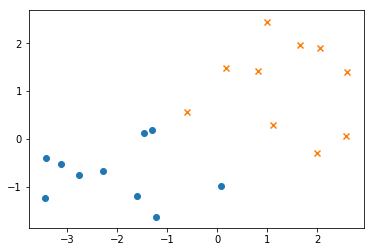

In [7]:

# Exemple d'utilisation:

data_desc, data_label = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

print("Taille du dataset généré :", np.shape(data_desc), "exemples")

# Affichage :
ut.plot2DSet(data_desc,data_label)


<font color="RED" size="+1">[Q]</font> Reprendre le code du TME 2 sur l'apprentissage d'un perceptron sur les données XOR et adaptez-les pour pouvoir utiliser les fonctions de `utils.py` et les classes de `Classifiers.py`.


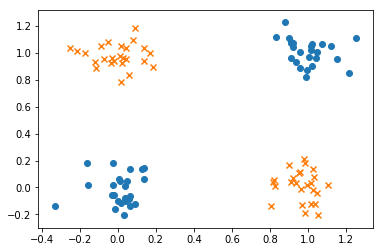

In [8]:
data_xor = ut.create_XOR(25,0.01)
ut.plot2DSet(data_xor[0], data_xor[1])

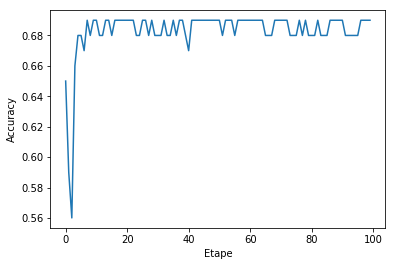

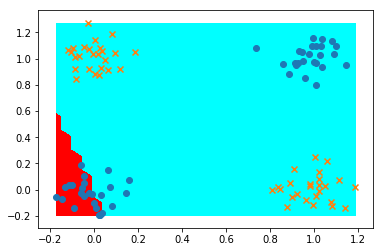

In [9]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# ------------------------ A COMPLETER :

un_classifieur = cl.ClassifierPerceptron(2,0.01)
data_xor, label_xor = ut.create_XOR(25,0.01)

# On laisse le classifieur apprendre pendant N itérations, on affiche à chaque fois l'accuracy
N = 100
accuracy = []

for i in range(N):
    un_classifieur.train(data_xor, label_xor)
    accuracy.append(un_classifieur.accuracy(data_xor, label_xor))

# Affichage de l'évolution de l'accuracy en fonction du nombre d'itérations
plt.plot(accuracy)
plt.xlabel('Etape')
plt.ylabel('Accuracy')
plt.show()
    
# Traçage de la frontière

ut.plot_frontiere(data_xor, label_xor, un_classifieur)
ut.plot2DSet(data_xor, label_xor)

Kernel Trick
--------------

Un "kernel" est une "fonction noyau" (ou simplement "noyau") qui permet de représenter des données d'un espace donné dans un autre espace, souvent de dimension plus grande.

Dans notre implémentation, pour pouvoir utiliser différents types de fonction noyau, nous définissons une classe abstraite :

**Notes personelles:**

Les **_méthodes à noyaux_** sont une classe de méthodes qui permettent à partir d’un algorithme linéaire d’obtenir une version non linéaire. Le principe est d’appliquer l’algorithme linéaire sur une projection des données dans un espace de dimension (en général) plus grande. Dans certaines conditions, l’existence de cette projection est garantie sans pour autant avoir besoin de l’expliciter. Les résultats de l’analyse linéaire effectuée sur les données projetées peuvent être « rapatriés » dans l’espace initial (dit _« espace de départ »_) grâce à des entités appelées _« fonctions noyaux »_, obtenant ainsi une version non-linéaire de l’algorithme initial. Les noyaux garantissent le bon fonctionnent d’un ensemble de caractéristiques mathématiques, appellées _« le truc à noyaux »_ (_kernel trick_ en anglais) qui permet de calculer le produit scalaire entre les projections de deux vecteurs via une fonction noyau, sans connaître la forme spécifique de la projection.

In [10]:
class Kernel():
    """ Classe pour représenter des fonctions noyau
    """
    def __init__(self, dim_in, dim_out):
        """ Constructeur de Kernel
            Argument:
                - dim_in : dimension de l'espace de départ (entrée du noyau)
                - dim_out: dimension de l'espace de d'arrivée (sortie du noyau): en général plus grande que dim_in
        """
        self.input_dim = dim_in
        self.output_dim = dim_out
        
    def get_input_dim(self):
        """ rend la dimension de l'espace de départ
        """
        return self.input_dim

    def get_output_dim(self):
        """ rend la dimension de l'espace d'arrivée
        """
        return self.output_dim
    
    def transform(self, V):
        """ ndarray -> ndarray
            fonction pour transformer le vecteur V dans le nouvel espace de représentation
        """        
        raise NotImplementedError("Please Implement this method")


L'intérêt de définir une classe mère `Kernel` qui servira à définir des noyaux est que l'on pourra maintenant définir des algorithmes génériques qui pourront prendre des noyaux quelconques en argument.

### Un premier noyau

Le premier noyau, très simple, que l'on définit permet de projeter (manuellement) des données 2D dans un espace de plus grande dimension. 

Voici un exemple de projection qui transforme le vecteur $(x_1,x_2)$ en vecteur $(x_1,x_2,1)$

In [12]:
class KernelBias(Kernel):
    """ Classe pour un noyau simple 2D -> 3D
    """
    def transform(self, V):
        """ ndarray de dim 2 -> ndarray de dim 3            
            rajoute une 3e dimension au vecteur donné
        """
        V_proj = np.asarray([V[0],V[1],1])
        return V_proj

In [13]:
# Exemple d'utilisation : 
kb = KernelBias(2,3)
kb.transform(data_desc[0])

array([-3.45441976, -1.22748748,  1.        ])

### Un noyau un peu plus compliqué

<font color="RED" size="+1">**[Q]**</font> Implémenter le kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. 

In [14]:
# ------------------------ A COMPLETER

class KernelPoly(Kernel):
    def transform(self,V):
        """ ndarray de dim 2 -> ndarray de dim 6            
            ...
        """
        V_proj = np.asarray([1,V[0],V[1],V[0]*V[0],V[1]*V[1],V[0]*V[1]])
        return V_proj

In [15]:
# Exemple d'utilisation : 
kp = KernelPoly(2,6)
kp.transform(data_desc[0])

array([ 1.        , -3.45441976, -1.22748748, 11.93301585,  1.50672551,
        4.240257  ])

<font color="RED" size="+1">**[Q]**</font> Implémenter la classe `ClassifierPerceptronKernel` qui prend un kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données. Tester ce perceptron sur le dataset 1 (2 gaussiennes) et le dataset XOR.

**Attention** : à partir de maintenant, si vous souhaitez utiliser les classes définies dans votre fichier `Classifiers.py` il est nécessaire de préfixer leur nom par `cl.`

Par exemple :

            class ClassifierPerceptronKernel(cl.Classifier):
                ...
                ...


In [16]:
# ------------------------ A COMPLETER :
class ClassifierPerceptronKernel(cl.Classifier):
    def __init__(self, input_dimension, learning_rate, noyau):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (espace originel)
                - learning_rate : 
                - noyau : Kernel à utiliser
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        # On choisit w le vecteur des poids synaptiques aléatoirement
        self.w = np.random.uniform(size = self.input_dimension)
        self.epsilon = learning_rate
        self.kernel = noyau
        
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        # On applique le produit sur le vecteur x projeté par le kernel
        return np.vdot(self.w, self.kernel.transform(x))
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        if self.score(x) < 0:
            return -1
        else:
            return 1

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        
        for i in range(len(desc_set)):
            # On commence par projeter chaque vecteur de desc avec le kernel
            x_i = self.kernel.transform(desc_set[i])
            y_i = label_set[i]
            if(self.predict(desc_set[i]) != y_i):
                self.w += self.epsilon*x_i*y_i

<font color="RED" size="+1">**[Q]**</font> Entraîner un perceptron kernelisé utilisant un `KernelPoly` sur un dataset correspondant au XOR (cf. sujet du TME 2). Que constatez-vous ? Proposez une explication.

#### Avec un dataset correspondant au XOR

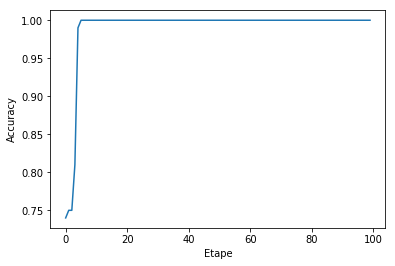

Accuracy final:  1.0


In [17]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# ------------------------ A COMPLETER :

# Initialisation du kernel
kp = KernelPoly(2,6)

# Initialisation du classifieur perceptron
un_classifieur = ClassifierPerceptronKernel(6,0.01,kp)

# Initialisation du dataset XOR
data_xor, label_xor = ut.create_XOR(25,0.01)

# On laisse le classifieur apprendre pendant N itérations, on affiche à chaque fois l'accuracy
N = 100
accuracy = []

for i in range(N):
    un_classifieur.train(data_xor, label_xor)
    accuracy.append(un_classifieur.accuracy(data_xor, label_xor))

    # Affichage de l'évolution de l'accuracy en fonction du nombre d'itérations

plt.plot(accuracy)
plt.xlabel('Etape')
plt.ylabel('Accuracy')
plt.show()

print("Accuracy final: ", accuracy[-1])

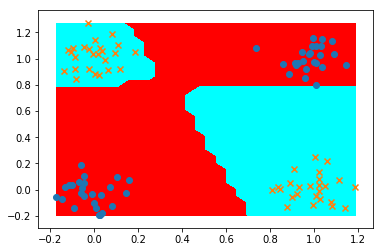

In [21]:
ut.plot_frontiere(data_xor, label_xor,un_classifieur)
ut.plot2DSet(data_xor, label_xor)

## Mise en oeuvre sur des données réelles 
-------
A partir de datasets trouvés sur le web, réaliser un ensemble d'expérimentations permettant de comparer les 3 classifiers (knn, perceptron de Rosenblatt et version kernélisée) que vous avez implémentés.

Par exemple, vous pouvez utiliser les datasets suivants:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- https://www.kaggle.com/uciml/indian-liver-patient-records
- voir sur les données ouvertes de Paris : https://opendata.paris.fr/explore/?sort=modified

Afin d'utiliser de tels jeux de données, il sera certainement nécessaire que vous réalisiez un prétraitement afin de pouvoir utiliser vos implémentations.

### Chargement du fichier "base_2D.csv"

Les datasets classiques qui sont disponibles sur le web sont généralement fournis au format CSV (*Comma Separated Values*) présenté dans le cours 2: chaque exemple est donné sur une ligne, et sur cette ligne les valeurs de description sont séparées par une virgule. Le plus souvent, le label de l'exemple est aussi donné sur cette ligne, tout à la fin.

Pour lire un fichier CSV et pouvoir travailler dessus, nous utilisons la commande <code>pd.read_csv()</code> de la librairie `pandas`. Cette fonction prend en argument une chaîne de caractères qui don<code>DataFrame</code>ne le nom du fichier à ouvrir (avec le chemin d'accès s'il n'est pas dans le répertoire courant) et elle rend un <code>DataFrame</code>.

Pour tester, utiliser le fichier `base-2D.csv` qui se trouve dans le répertoire `data`.
On peut noter que la première du fichier contient le nom des colonnes qui seront données au dataframe créé.
Si ces noms sont absent (fichier `csv` brut), consulter l'aide sur cette fonction pour voir comment l'utiliser.

In [29]:
# Par exemple:
data_2D = pd.read_csv("data/dataR2.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

Il y a 116 exemples dans la base.


In [30]:
data_2D

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [31]:
type(data_2D)

pandas.core.frame.DataFrame

Le problème pour nous c'est qu'un tel dataframe contient à la fois les données et les labels, il faut donc les séparer en 2 `ndarray`.

In [32]:
# On commence par construire un ndarray avec les valeurs du dataframe
data_2D.values

array([[ 48.        ,  23.5       ,  70.        , ...,   7.99585   ,
        417.114     ,   1.        ],
       [ 83.        ,  20.69049454,  92.        , ...,   4.06405   ,
        468.786     ,   1.        ],
       [ 82.        ,  23.12467037,  91.        , ...,   9.27715   ,
        554.697     ,   1.        ],
       ...,
       [ 65.        ,  32.05      ,  97.        , ...,  10.33      ,
        314.05      ,   2.        ],
       [ 72.        ,  25.59      ,  82.        , ...,   3.27      ,
        392.46      ,   2.        ],
       [ 86.        ,  27.18      , 138.        , ...,   4.35      ,
         90.09      ,   2.        ]])

In [33]:
# On découpe ensuite pour séparer les descriptions des labels
data_2D_desc = data_2D.values[:,0:8]
data_2D_labels = data_2D.values[:,9]

In [34]:
data_2D_desc

array([[48.        , 23.5       ],
       [83.        , 20.69049454],
       [82.        , 23.12467037],
       [68.        , 21.36752137],
       [86.        , 21.11111111],
       [49.        , 22.85445769],
       [89.        , 22.7       ],
       [76.        , 23.8       ],
       [73.        , 22.        ],
       [75.        , 23.        ],
       [34.        , 21.47      ],
       [29.        , 23.01      ],
       [25.        , 22.86      ],
       [24.        , 18.67      ],
       [38.        , 23.34      ],
       [44.        , 20.76      ],
       [47.        , 22.03      ],
       [61.        , 32.03895937],
       [64.        , 34.5297228 ],
       [32.        , 36.51263743],
       [36.        , 28.57667585],
       [34.        , 31.97501487],
       [29.        , 32.27078777],
       [35.        , 30.27681661],
       [54.        , 30.48315806],
       [45.        , 37.03560819],
       [50.        , 38.57875854],
       [66.        , 31.44654088],
       [35.        ,

In [35]:
data_2D_labels

array([ 70.,  92.,  91.,  77.,  92.,  92.,  77., 118.,  97.,  83.,  78.,
        82.,  82.,  88.,  75.,  86.,  84.,  85.,  95.,  87.,  86.,  87.,
        84.,  84.,  90.,  83., 106.,  90.,  90.,  80., 101., 101.,  87.,
        89.,  77.,  79.,  82., 101., 103.,  76.,  83.,  94.,  85.,  93.,
       102.,  90.,  94.,  60.,  89.,  96., 110.,  85., 102.,  74.,  94.,
        92.,  93., 102.,  93.,  92.,  95., 112.,  78., 103.,  98., 116.,
        86.,  98.,  88., 114.,  92., 106., 105., 105.,  86., 101.,  92.,
       103., 201.,  97.,  77., 100.,  99., 112.,  98.,  85.,  90., 196.,
       199., 139., 128., 100.,  87., 134., 131.,  70.,  99., 103., 104.,
       108.,  88.,  89.,  97.,  83.,  95., 134.,  90.,  92., 131., 152.,
       119.,  92., 100.,  97.,  82., 138.])

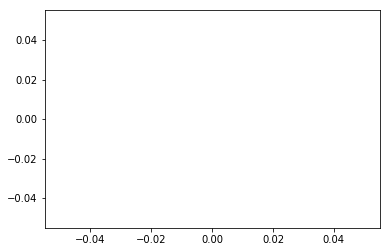

In [36]:
ut.plot2DSet(data_2D_desc,data_2D_labels)

<font color="RED" size="+1">**[Q]**</font> Réaliser des expérimentations avec des datasets réels.

Charger les données, afficher des informations statistiques sur les données, commencer à réfléchir comment appliquer les classifieurs que vous avez implémentés sur ces données...